In [ ]:
import numpy as np
from EdgeFinder import EdgeFinder as ef
from PIL import Image
from pylab import *
from scipy.ndimage import filters

Matplotlib created a temporary config/cache directory at /var/folders/f2/r7tvqcl54_g_85f8twpz3l8w0000gn/T/matplotlib-aa6zwzcq because the default path (/Users/chheangly/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [11]:
#get import the image
im = np.array(Image.open('road1.jpg').convert('L'))
#apply gray transform
im = 255.0*(im/255.0)**4

In [12]:
im = filters.gaussian_filter(im,5)

In [13]:
x = int(3/4*len(im))-120
y = int(len(im[1])/2)

lin1 = np.flip(im[x,0:y-10])
lin2 = im[x,-(y-10):]

print(lin1.shape)
print(lin2.shape)

(310,)
(310,)


In [16]:
#processing to find edge
s1 = 80
hd = 30
e1 = ef(s1,hd,lin1)
e2 = ef(s1,hd,lin2)


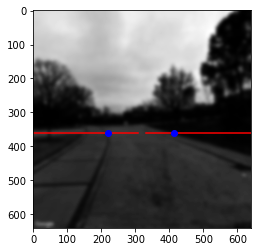

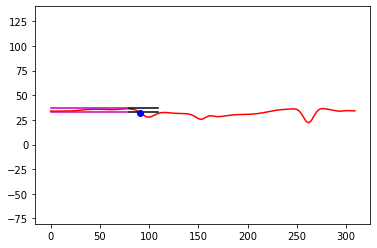

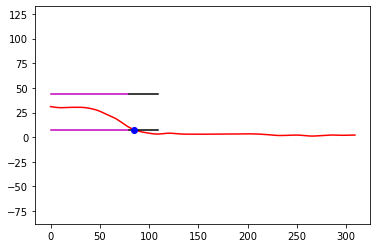

In [17]:
figure()
imshow(im)
gray()
plot(range(0,y-10),np.full(len(lin1),x),'r')
plot(range(y+10,len(im[1])),np.full(len(lin2),x),'r')
plot(y-10 - e1.abnormal['num'],x,'bo')
plot(y+10 + e2.abnormal['num'],x,'bo')
figure()
axis('equal')
e1.plot_data()
figure()
axis('equal')
e2.plot_data()
show()
